In [ ]:
dddd

AlexNet was designed by Sir Geoffrey Hinton and his student, they won the 2012 ImageNet competition, It was the first architecture after LeNet which brings the revolution in Deep Learning industry. It achieved a top-5 error of 15.3% in ImageNet Challenge. This was 10.8% lower than that of runner up.

## AlexNet Architecture:
AlexNet consist of eight layers: Five Convolutional layers, Three Max-Pooling layers, Two Normalization Layers, 2 Fully Connected layers and One Softmax layer.
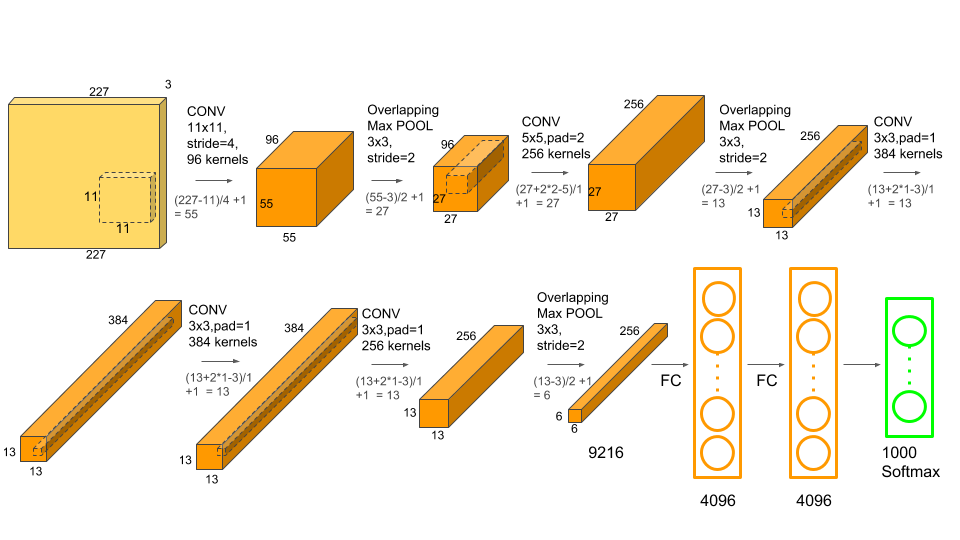

Large Kernels are used in Alex-Net like 96 Kernels are used in first Convolutional layer which extract the important features from the image. Then next two Convolutional layers are followed by Overlapping Max Pooling layers. The Kernel size of the Convolutional layers increased till third Convolutional layer i.e 256, 384 and 384 these large number of kernels are used to extract lots of features from the image. The fourth and fifth Convolutional layers of kernel size of 384, 384 are connected directly. The fifth Convolutional layer is followed by Overlapping Max Pooling layer. The output of Pooling layer goes to the first Fully Connected layer. The second Fully Connected layer goes to softmax classifier with 1000 class labels.
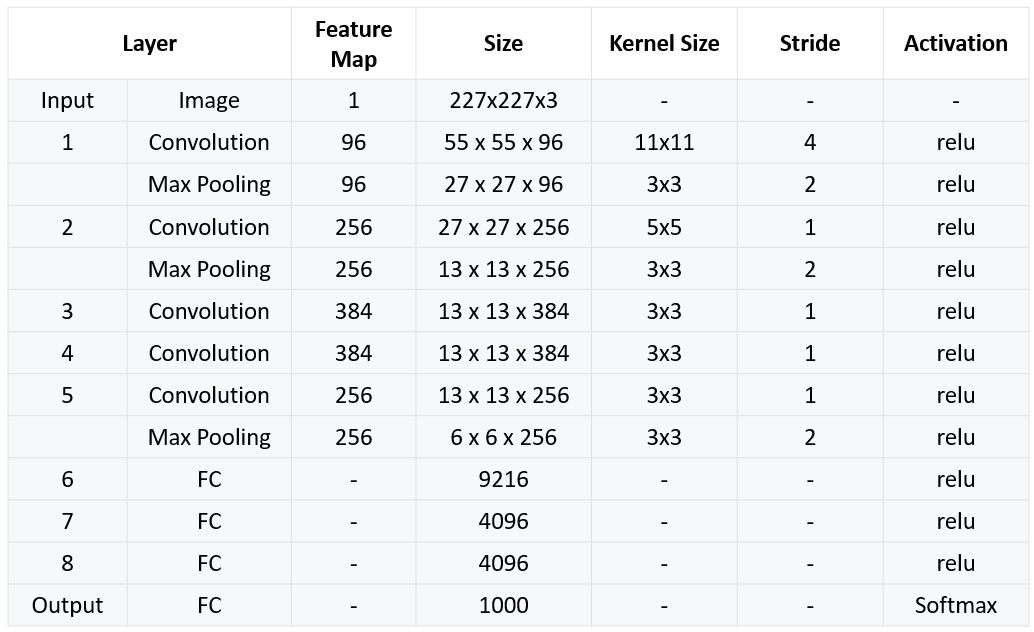

## Features of Alex-Net
### 1. ReLU
ReLU based Convolutional Networks trained 6 times faster then sigmoid or tanh based networks.
### 2. Overlapping Pooling Layer
Overfitting is not defined over a particular size of dataset. If we have large datasets such as the Imagenet, then overfitting could very well be applicable for a large portion of it or a small portion of it. It is simply a phenomenon where a CNN might not learn to extract rich features (more generalizable model), but rather tends to extract features that are only good for classifying certain number of examples in the training set. When we have non-overlapping pooling regions, we can see that the spatial information is quickly lost and the network “sees” only the dominant pixel values (winning unit for max pooling for example). But with overlapping regions, there is less loss of surrounding spatial information. Overlapping Max Pool layers are similar to the Max Pool layers, except the adjacent windows over which the max is computed overlap each other.
### 3. Local Response Normalization
Since ReLU activation function was used so that value after the activation function has no range like sigmoid or tanh so a normalization will usually be done after ReLU.

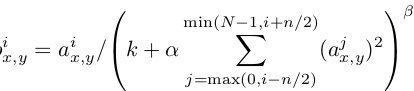


### 4. Dropout Layer
Since Alex-Net had 60 million parameters, so it has a major issue in terms of overfitting. To overcome this issue dropout was used. Dropout is a regularization method that dropped a neuron on probability basis from the Neural Network. When a neuron is dropped, it does not contribute to forward propagation or backward propagation.
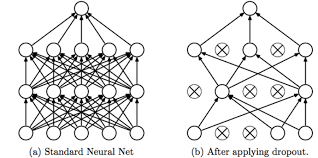


### 5. Data Augmentation
Data augmentation is a technique to artificially create new training data from existing data. It helps to increase the size of the dataset and introduce variability in the dataset, without actually collecting new data. The neural network treats these images as distinct images anyway. Data augmentation can be used to address the requirements like diversity in training data and augmented data can also be used to address the class imbalance problem in classification tasks. Also Data Augmentation helps reduce over-fitting.
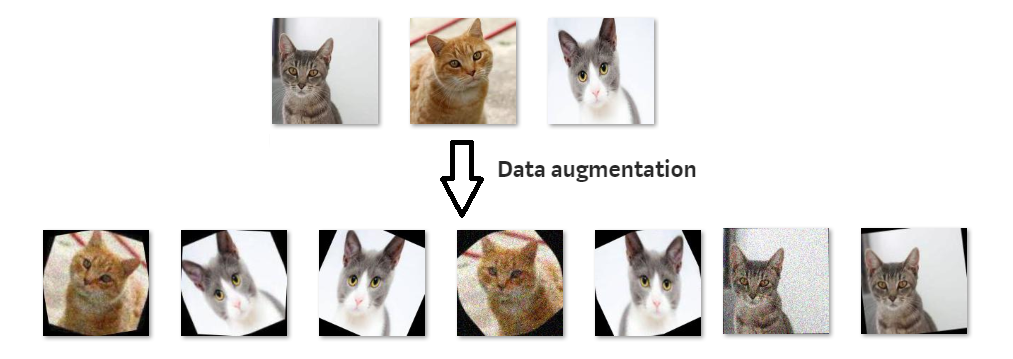


In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten,\
Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
import numpy as np
np.random.seed(1000)

In [8]:
import tflearn.datasets.oxflower17 as oxflower17
X, Y = oxflower17.load_data(one_hot=True)

Instructions for updating:
non-resource variables are not supported in the long term
curses is not supported on this machine (please install/reinstall curses for an optimal experience)


100.0% 60276736 / 60270631


Succesfully downloaded 17flowers.tgz 60270631 bytes.
File Extracted
Starting to parse images...
Parsing Done!


In [13]:
#Create a sequential model
model = Sequential()

# 1st Convolutional Layer
model.add(Conv2D(filters=96, input_shape=(224,224,3), kernel_size=(11,11),\
 strides=(4,4), padding='valid'))
model.add(Activation('relu'))
# Pooling 
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Batch Normalisation before passing it to the next layer
model.add(BatchNormalization())

# 2nd Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(11,11), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Batch Normalisation
model.add(BatchNormalization())

# 3rd Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Batch Normalisation
model.add(BatchNormalization())

# 4th Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Batch Normalisation
model.add(BatchNormalization())

# 5th Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Batch Normalisation
model.add(BatchNormalization())

# Passing it to a dense layer
model.add(Flatten())
# 1st Dense Layer
model.add(Dense(4096, input_shape=(224*224*3,)))
model.add(Activation('relu'))
# Add Dropout to prevent overfitting
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())

# 2nd Dense Layer
model.add(Dense(4096))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())

# 3rd Dense Layer
model.add(Dense(1000))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())

# Output Layer
model.add(Dense(17))
model.add(Activation('softmax'))

In [14]:
model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 54, 54, 96)        34944     
_________________________________________________________________
activation_13 (Activation)   (None, 54, 54, 96)        0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 27, 27, 96)        0         
_________________________________________________________________
batch_normalization_12 (Batc (None, 27, 27, 96)        384       
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 17, 17, 256)       2973952   
_________________________________________________________________
activation_14 (Activation)   (None, 17, 17, 256)       0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 8, 8, 256)        

In [16]:
# Compile
model.compile(loss='categorical_crossentropy', optimizer='adam',\
metrics=['accuracy'])

In [20]:
# Train
model.fit(X, Y, batch_size=64, epochs=30,verbose=1, validation_split=0.1, shuffle=True)

Train on 1224 samples, validate on 136 samples
Epoch 1/30
1224/1224 [==============================] - 38s 31ms/sample - loss: 0.2265 - acc: 0.9289 - val_loss: 3.3987 - val_acc: 0.4559
Epoch 2/30
1224/1224 [==============================] - 42s 34ms/sample - loss: 0.2777 - acc: 0.9199 - val_loss: 3.9336 - val_acc: 0.4412
Epoch 3/30
1224/1224 [==============================] - 41s 33ms/sample - loss: 0.3323 - acc: 0.8897 - val_loss: 3.8378 - val_acc: 0.4118
Epoch 4/30
1224/1224 [==============================] - 39s 32ms/sample - loss: 0.4161 - acc: 0.8636 - val_loss: 2.1874 - val_acc: 0.6103
Epoch 5/30
1224/1224 [==============================] - 41s 33ms/sample - loss: 0.3171 - acc: 0.8946 - val_loss: 2.7681 - val_acc: 0.5294
Epoch 6/30
1224/1224 [==============================] - 39s 32ms/sample - loss: 0.2731 - acc: 0.9109 - val_loss: 2.2226 - val_acc: 0.5662
Epoch 7/30
1224/1224 [==============================] - 41s 33ms/sample - loss: 0.3799 - acc: 0.8856 - val_loss: 2.6135 - val